In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

<class 'ModuleNotFoundError'>: No module named 'seaborn'

In [2]:
train_df = pd.read_csv("sign_mnist_train.csv")
test_df = pd.read_csv("sign_mnist_test.csv")
train_df.head()

,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,92,189,188,188.1,187,109,114,117,119,121,...,116.5,102.1,100.1,101.2,99,98,99.1,101.3,150,212
0,141,142,143,145,147,149,150,151,151,154,155,155,156,157,159,160,161,162,163,165,166,165,165,165,165,167,169,169,141,143,144,146,148,149,150,151,153,154,156,156,157,159,159,159,160,162,164,166,166,166,165,166,167,167,169,170,142,143,144,146,148,150,151,152,153,154,155,156,158,159,160,160,161,163,164,166,166,167,166,166,168,168,169,171,143,144,145,147,149,151,153,154,153,156,156,157,158,159,160,161,163,164,165,166,167,167,167,167,168,169,170,170,143,144,146,148,150,151,153,154,154,156,157,158,160,161,162,163,164,165,165,167,166,167,165,166,170,171,171,171,144,145,146,148,150,151,155,156,157,158,158,158,160,160,159,161,165,166,165,162,165,168,156,143,171,172,172,173,145,147,147,148,150,152,154,155,157,157,156,158,163,162,146,132,150,166,157,139,138,165,160,123,163,173,173,174,145,147,149,150,151,153,155,155,159,161,146,132,162,167,151,129,115,160,154,135,109,148,165,128,144,175,174,174,146,148,149,150,152,153,154,153,175,170,154,122,150,167,154,137,108,163,156,134,102,123,166,149,121,151,174,174,146,146,149,150,151,158,151,137,184,171,154,124,157,174,161,132,123,177,157,127,101,94,154,161,135,114,151,177,145,147,150,150,156,174,159,137,173,182,158,127,145,186,169,125,135,182,154,116,88,63,128,159,150,119,112,177,147,148,150,149,175,188,168,151,154,190,167,137,131,188,170,124,122,166,141,112,76,52,127,168,154,124,108,176,148,149,150,150,179,191,176,159,144,187,169,144,121,173,165,127,93,135,130,111,70,69,157,168,156,120,122,180,149,149,150,152,175,175,168,155,132,172,163,139,102,131,141,115,83,130,152,118,69,97,163,157,144,110,138,182,148,151,151,155,172,155,156,133,109,144,142,125,90,87,125,106,88,133,161,143,129,136,151,144,130,103,150,179,147,151,150,162,180,163,153,127,107,119,130,120,85,66,121,118,136,163,165,156,150,140,135,131,124,99,158,180,149,150,150,175,173,146,130,130,119,100,130,125,90,65,127,161,170,165,161,155,145,136,128,122,116,95,166,182,149,149,156,190,175,157,136,122,115,86,118,121,99,131,172,176,170,160,156,149,140,130,121,112,98,111,179,180,149,149,152,192,181,168,158,143,123,116,128,136,156,180,179,173,168,160,150,140,129,122,110,96,99,159,179,179,150,150,154,193,186,174,167,158,143,137,151,163,180,182,179,176,169,159,146,130,116,110,93,94,156,179,180,181,150,150,160,204,194,179,170,161,154,151,156,168,182,185,181,178,171,156,143,124,104,96,85,144,180,180,181,181,150,149,157,203,198,181,171,163,159,161,161,170,180,182,179,171,167,155,137,118,95,82,131,178,179,181,181,182,150,149,152,195,195,183,176,168,165,170,169,173,178,178,175,164,158,150,131,105,82,119,177,180,180,180,181,182,150,150,150,189,192,189,184,176,172,173,172,174,176,172,168,156,145,136,113,83,115,172,180,181,180,180,181,181,150,150,150,189,192,193,191,185,181,174,167,171,171,168,161,147,134,118,85,106,169,179,180,181,181,181,181,181,151,150,152,195,200,...,180,179,180,180,181,181,182,182,182,184
6,178,180,180,181,182,185,186,190,192,192,194,196,197,199,197,197,198,199,200,201,201,201,201,199,198,199,198,198,179,181,181,183,184,187,188,191,194,194,196,197,197,198,198,199,199,201,201,200,200,201,201,200,200,200,199,199,179,181,182,185,187,190,190,191,194,196,198,198,198,199,200,201,201,202,203,202,202,201,203,203,203,202,201,199,181,182,184,186,188,189,191,193,195,196,

In [3]:
# Checking number of training samples for each alphabet.
plt.figure(figsize = (10,10))
sns.set_style("darkgrid")
sns.countplot(train_df['label'])

<Figure size 1000x1000 with 0 Axes>

<class 'NameError'>: name 'sns' is not defined

In [4]:
# Seperating the labels from the training features.
y_train = train_df['label']
y_test = test_df['label']
y = test_df['label']
del train_df['label']
del test_df['label']

# Using Label Binarizer to encode the features. 
label_binarizer = LabelBinarizer()
y_train = label_binarizer.fit_transform(y_train)
y_test = label_binarizer.fit_transform(y_test)
x_train = train_df.values
x_test = test_df.values

# Normalizing the data
x_train = x_train / 255
x_test = x_test / 255

# Reshaping the data from 1-D to 3-D as required through input by CNN's
x_train = x_train.reshape(-1,28,28,1)
x_test = x_test.reshape(-1,28,28,1)

<class 'KeyError'>: 'label'

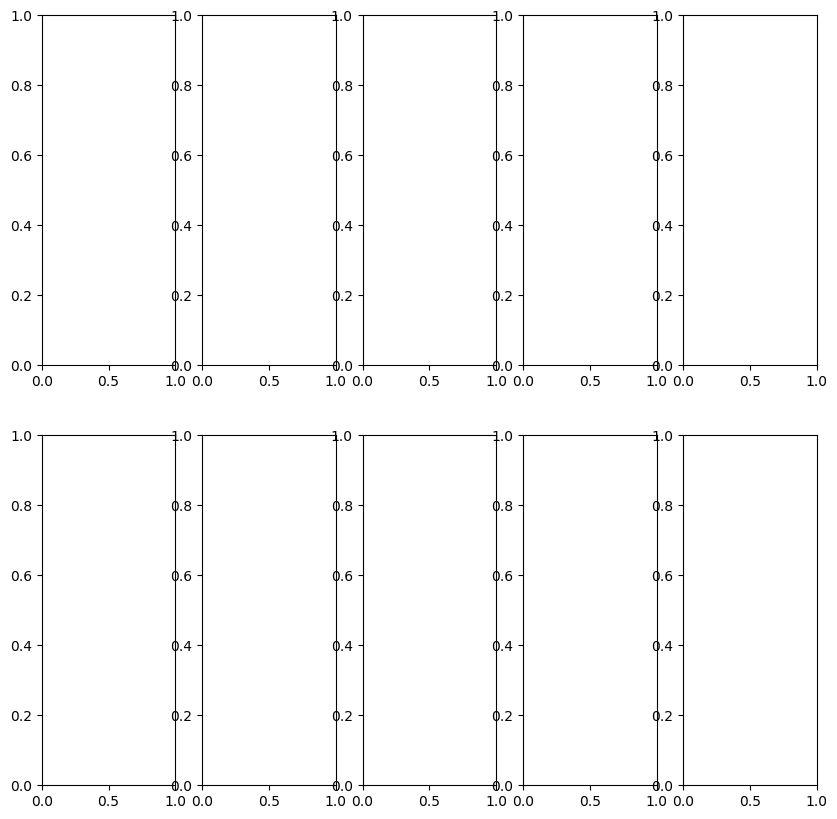

<class 'NameError'>: name 'x_train' is not defined

In [5]:
#Checking the Pre processed images.
f, ax = plt.subplots(2,5) 
f.set_size_inches(10, 10)
k = 0
for i in range(2):
    for j in range(5):
        ax[i,j].imshow(x_train[k].reshape(28, 28) , cmap = "gray")
        k += 1
    plt.tight_layout()

In [6]:
# Data Augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images
datagen.fit(x_train) # applying the augmentation to the training data

<class 'NameError'>: name 'ImageDataGenerator' is not defined

In [7]:
#Sequential CNN Model
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', patience = 2, verbose=1,factor=0.5, min_lr=0.00001)
model = Sequential()
model.add(Conv2D(75 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu' , input_shape = (28,28,1)))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(50 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Conv2D(25 , (3,3) , strides = 1 , padding = 'same' , activation = 'relu'))
model.add(BatchNormalization())
model.add(MaxPool2D((2,2) , strides = 2 , padding = 'same'))
model.add(Flatten())
model.add(Dense(units = 512 , activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(units = 24 , activation = 'softmax'))
model.compile(optimizer = 'adam' , loss = 'categorical_crossentropy' , metrics = ['accuracy'])
model.summary()

<class 'NameError'>: name 'ReduceLROnPlateau' is not defined

In [8]:
history = model.fit(datagen.flow(x_train,y_train, batch_size = 128) ,epochs = 20 , validation_data = (x_test, y_test) , callbacks = [learning_rate_reduction])

<class 'NameError'>: name 'model' is not defined

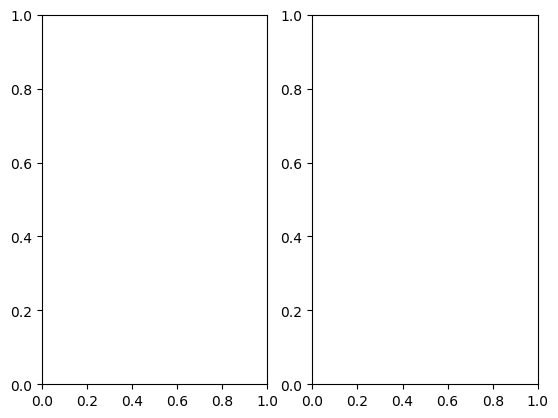

<class 'NameError'>: name 'history' is not defined

In [9]:
epochs = [i for i in range(20)]
fig , ax = plt.subplots(1,2)
train_acc = history.history['accuracy']
train_loss = history.history['loss']
val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']
fig.set_size_inches(16,9)

ax[0].plot(epochs , train_acc , 'go-' , label = 'Training Accuracy')
ax[0].plot(epochs , val_acc , 'ro-' , label = 'Testing Accuracy')
ax[0].set_title('Training & Validation Accuracy')
ax[0].legend()
ax[0].set_xlabel("Epochs")
ax[0].set_ylabel("Accuracy")

ax[1].plot(epochs , train_loss , 'g-o' , label = 'Training Loss')
ax[1].plot(epochs , val_loss , 'r-o' , label = 'Testing Loss')
ax[1].set_title('Testing Accuracy & Loss')
ax[1].legend()
ax[1].set_xlabel("Epochs")
ax[1].set_ylabel("Loss")
plt.show()

In [10]:
predictions = np.argmax(model.predict(x_test),axis=1)
for i in range(len(predictions)):
    if(predictions[i] >= 9):
        predictions[i] += 1
print(predictions)

<class 'NameError'>: name 'model' is not defined

In [11]:
classes = ["Class " + str(i) for i in range(25) if i != 9]
print(classification_report(y, predictions, target_names = classes))
cm = confusion_matrix(y,predictions)
cm = pd.DataFrame(cm , index = [i for i in range(25) if i != 9] , columns = [i for i in range(25) if i != 9])
plt.figure(figsize = (15,15))
sns.heatmap(cm,cmap= "Blues", linecolor = 'black' , linewidth = 1 , annot = True, fmt='')

<class 'NameError'>: name 'classification_report' is not defined